<h3>Imports</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

# Load dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\All.csv')

<h3>Feature Selection</h3>

In [4]:
# Filter numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Cleansing : Replace infinite values with NaN
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Cleansing : Drop rows with NaN or extreme values
df_cleaned = numeric_df.dropna()

# (Optional) If needed, you can also filter out extreme values manually by setting a threshold:
# threshold_value = 1e5  # Example threshold
# df_cleaned = df_cleaned[(df_cleaned < threshold_value).all(axis=1)]

# Feature selection : with VarianceThreshold
selector = VarianceThreshold(threshold=0.1)  # Adjust threshold if needed
X = df_cleaned  # Use the cleaned dataframe
X_high_variance = selector.fit_transform(X)

# Convert back to DataFrame with selected columns
selected_features = X.columns[selector.get_support()]
df_filtered = df_cleaned[selected_features]

print("Selected Features:", selected_features)

Selected Features: Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_path', 'dld_filename',
       'dld_getArg', 'urlLen', 'domainlength', 'pathLength', 'subDirLen',
       'fileNameLen', 'this.fileExtLen', 'ArgLen', 'argDomanRatio',
       'pathDomainRatio', 'argPathRatio', 'NumberofDotsinURL',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
       'Domain_LongestWordLength', 'Path_LongestWordLength',
       'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',

<h3>Heatmap #1</h3>

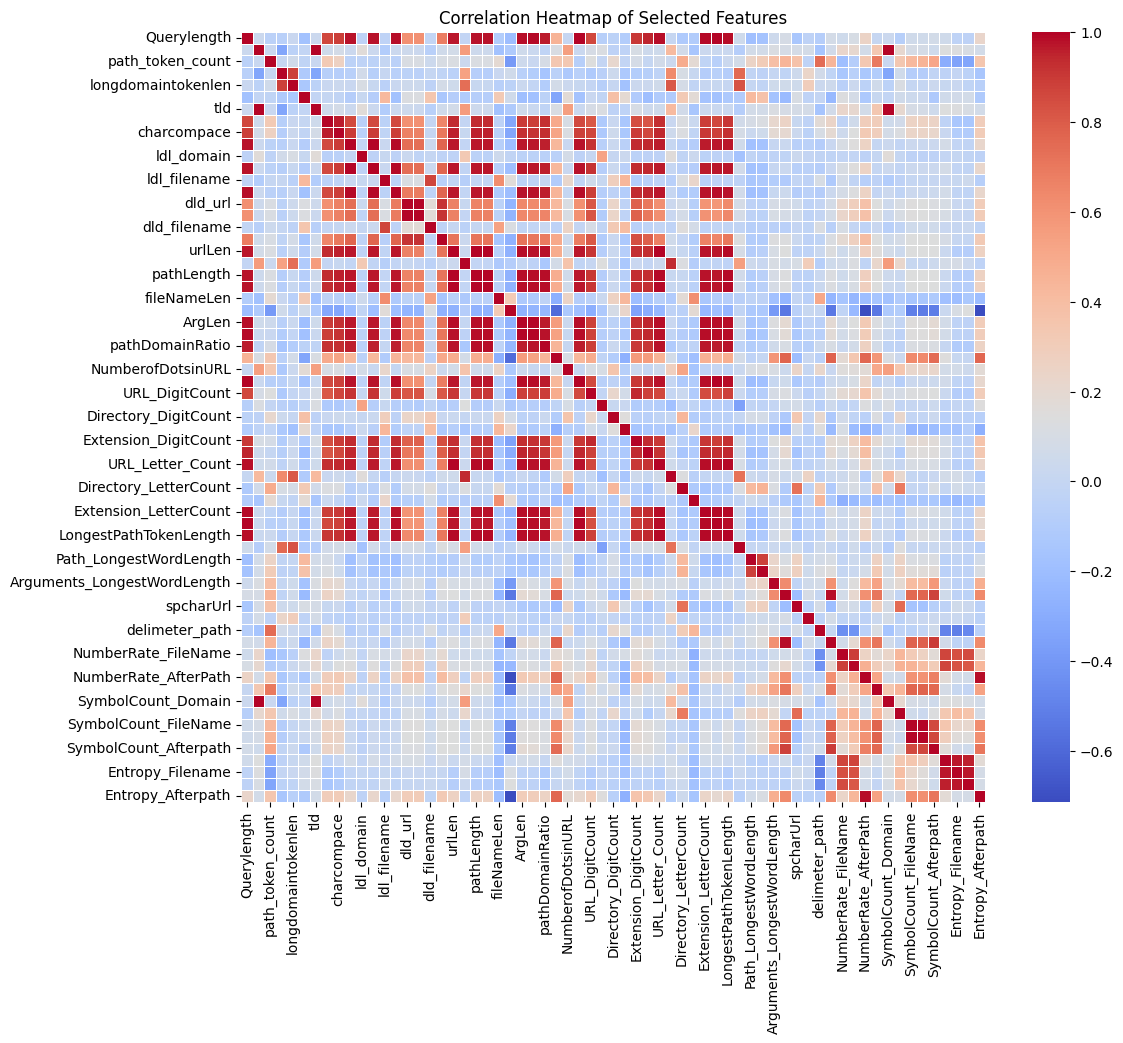

In [48]:
# Show Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

<h3>Further Reduction of Feature</h3>
<h5>This reduction uses a variance and correlation threshold. It drops features that has little to no variance and also features that is highly correlated to other features (this is to assume that there won't be much information shared from this feature)</h5>

In [5]:
# Increase threshold to further reduce features
selector = VarianceThreshold(threshold=0.8)  # Adjust as needed
X_high_variance = selector.fit_transform(df_cleaned)

# Convert back to DataFrame with selected columns
selected_features = X.columns[selector.get_support()]
df_filtered = df_cleaned[selected_features]

print("Selected Features after increasing variance threshold:", selected_features)

# Compute correlation matrix
correlation_matrix = df_filtered.corr().abs()

# Select upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df_reduced = df_filtered.drop(columns=to_drop)

print("Selected Features after removing highly correlated features:", df_reduced.columns)

Selected Features after increasing variance threshold: Index(['Querylength', 'path_token_count', 'avgdomaintokenlen',
       'longdomaintokenlen', 'avgpathtokenlen', 'charcompvowels',
       'charcompace', 'ldl_url', 'ldl_path', 'ldl_filename', 'ldl_getArg',
       'dld_url', 'dld_path', 'dld_getArg', 'urlLen', 'domainlength',
       'pathLength', 'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen',
       'argDomanRatio', 'pathDomainRatio', 'NumberofDotsinURL',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
       'Domain_LongestWordLength', 'Path_LongestWordLength',
       'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
       'URLQueries_variable', 'spcharUrl', 'd

<h3>Heatmap #2</h3>

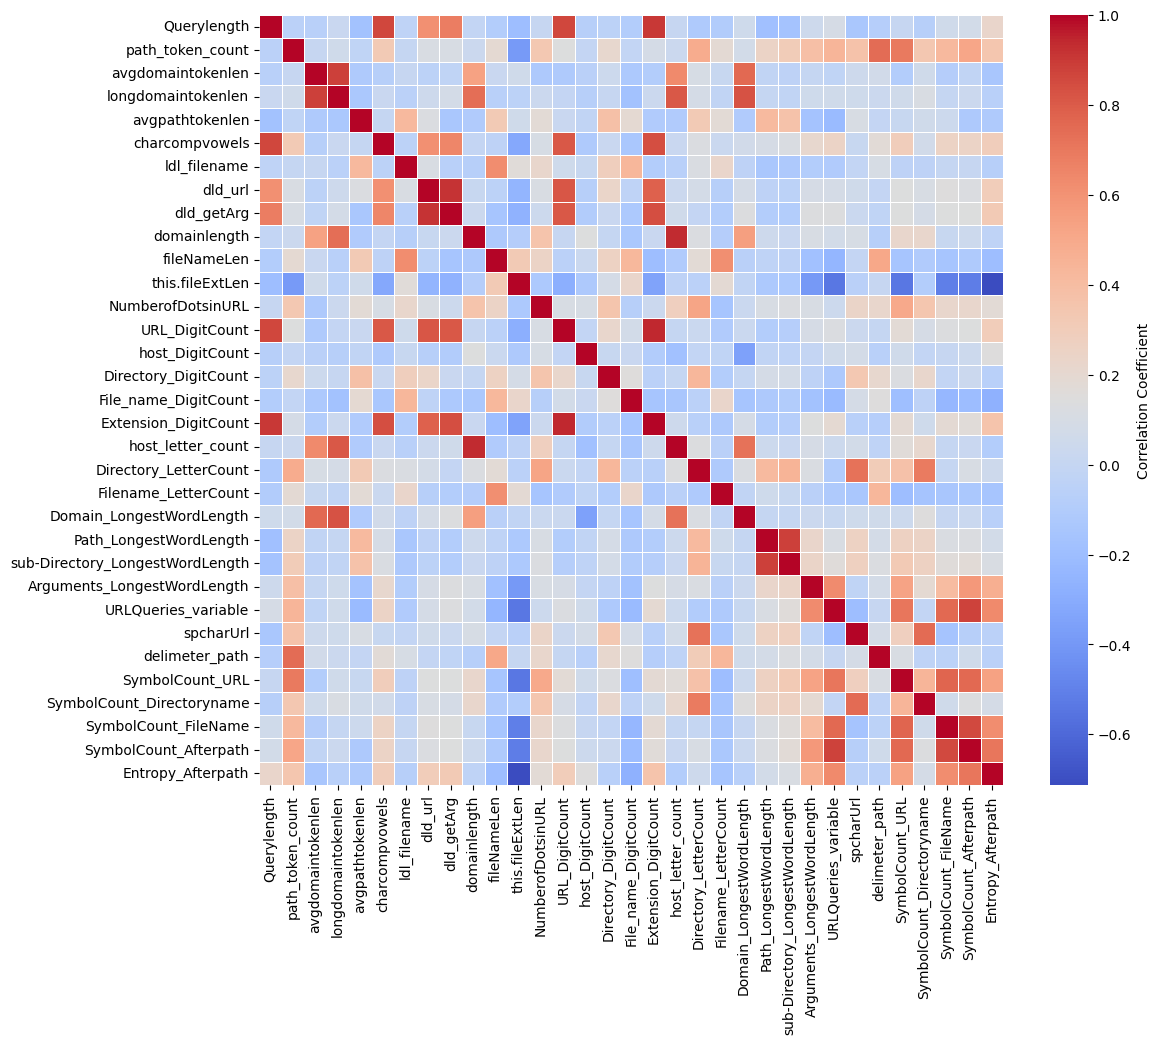

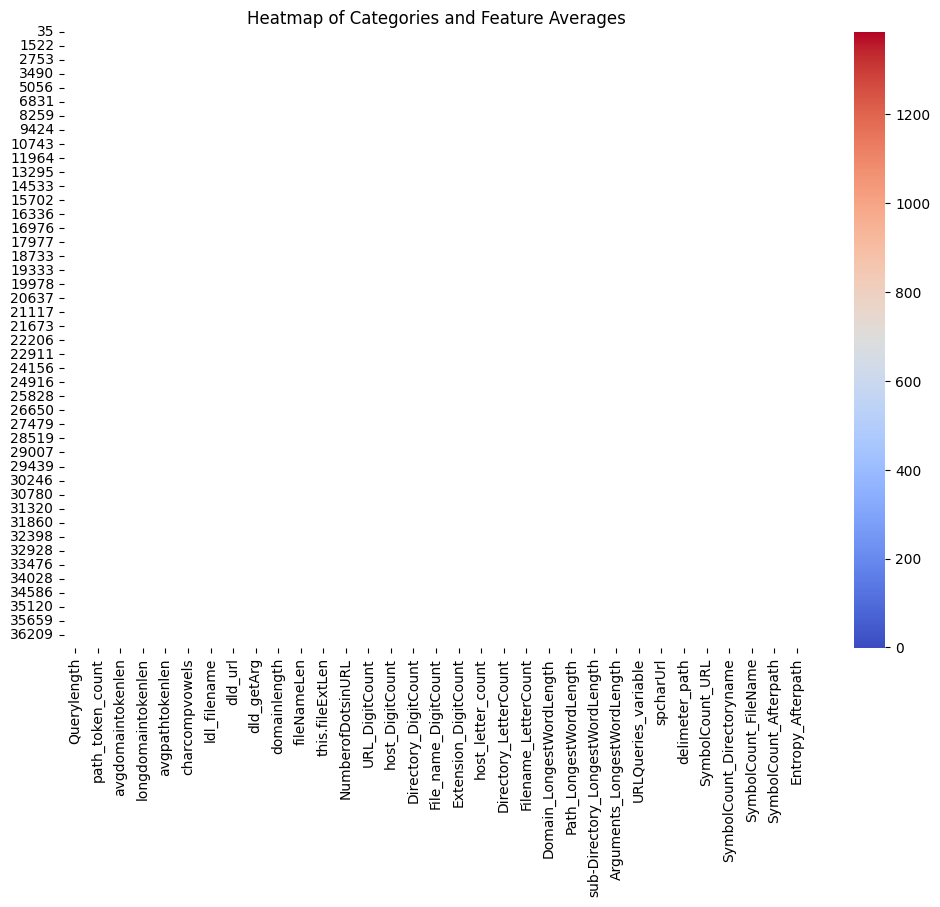

In [6]:
# Plot heatmap with custom colors
plt.figure(figsize=(12, 10))

#Show Heatmap
sns.heatmap(df_reduced.corr(), annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.show()


<h4>Based on the heatmap, these are some of the most correlated features :</h4>

1. path_token_count: This feature seems to have strong correlations with several other features, suggesting it might be a good predictor.
2. avgpathtokenlen: Similar to path_token_count, this feature also has strong correlations with other features.
3. symbolcount_url: This feature has higher correlations with other features compared to avgpathtokenlen, indicating it might be a more informative feature.
4. symbolcount_filename: This feature might also be relevant, as malicious URLs often have unusual or suspicious filenames.
5. tld: If your dataset includes the top-level domain of the URL, it might be a useful feature, as some TLDs are more commonly associated with malicious URLs.
6. url_length: The overall length of the URL might be a relevant feature, as malicious URLs often have longer and more complex structures.
